In [1]:
import numpy as np
import networkx as nx

In [2]:
A = np.array([[0.99, 0.26], [0.26, 0.53]])
B = np.array([[0.99, 0.26], [0.26, 0.53]])
for i in range(0, 12):
    B = np.kron(B, A)
print B.shape

(8192L, 8192L)


In [4]:
import random
KG = nx.Graph()
KG.add_nodes_from(range(8192))
for i in range(8192):
    for j in range(8192):
        tmpRandom = random.random()
        if tmpRandom < B[i, j]:
            KG.add_edge(i, j)

In [7]:
print len(KG.nodes()), len(KG.edges())
print nx.is_connected(KG)
GCC = max(nx.connected_component_subgraphs(KG), key=len)
print len(GCC.nodes())

8192 10650
False
5946


In [8]:
print nx.diameter(GCC)

18


In [9]:
GRQC = nx.read_edgelist("C:/Users/Think/Documents/CSE291F/CA-GrQc.txt")
GCC2 = max(nx.connected_component_subgraphs(GRQC), key=len)

In [11]:
print nx.average_shortest_path_length(GCC)
print nx.average_shortest_path_length(GCC2)

6.54045240922
6.04938001618


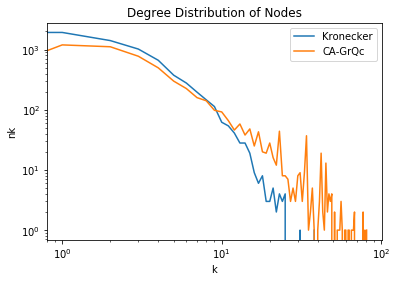

In [16]:
import matplotlib.pyplot as plt
degreeHistogram1 = nx.degree_histogram(KG)
degreeHistogram2 = nx.degree_histogram(GRQC)
x1 = range(len(degreeHistogram1))
x2 = range(len(degreeHistogram2))
plt.plot(x1, degreeHistogram1, label="Kronecker")
plt.plot(x2, degreeHistogram2, label="CA-GrQc")
plt.title("Degree Distribution of Nodes")
plt.ylabel("nk")
plt.xlabel("k")
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.savefig('degreeCompare.png')
plt.show()